# ADVERTISING SALES CHANNEL PROJECT

In [1]:
# IMPORTING RELEVANT LIBRARIES:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#library to remove outliers
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score


# IMPORTING FILE

In [2]:
ds = pd.read_csv('ad_sales_chanels.csv')

In [3]:
ds.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


OBSERVATIONS:
    
    There are presence of little outliers and skewness in newspaper column

In [4]:
ds.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

OBSERVATIONS:
    
    There are no null values in the dataset.

# UNIVARIATE ANALYSIS

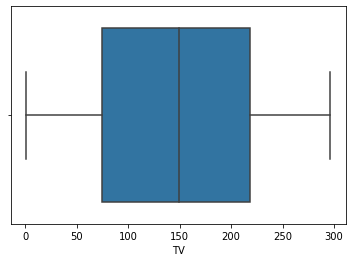

In [5]:
sns.boxplot(ds['TV'])

Observation:
    
    There  are no outliers in the TV column.

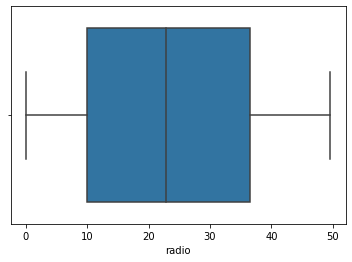

In [6]:
sns.boxplot(ds['radio'])

Observation:
    
    There  are no outliers in the radio column.

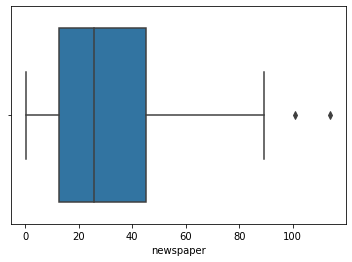

In [7]:
sns.boxplot(ds['newspaper'])

Observation:
    
    There are few outliers in the newspaper column.

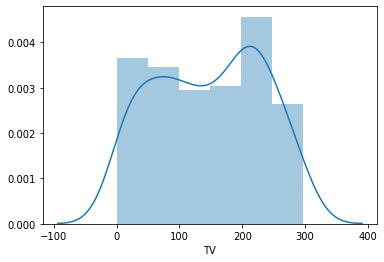

In [8]:
sns.distplot(ds['TV'])

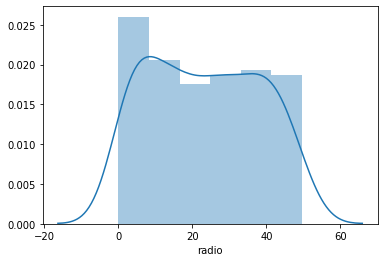

In [9]:
sns.distplot(ds['radio'])

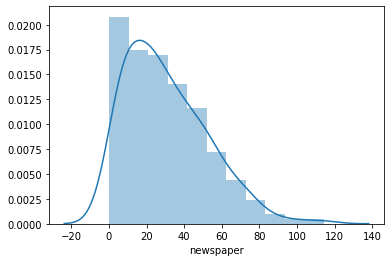

In [10]:
sns.distplot(ds['newspaper'])

In [11]:
ds.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

OBSERVATIONS:
    
    There are skewness present in newspaper column.

In [12]:
ds = ds.iloc[:, 1:5]

# BIVARIATE ANALYSIS

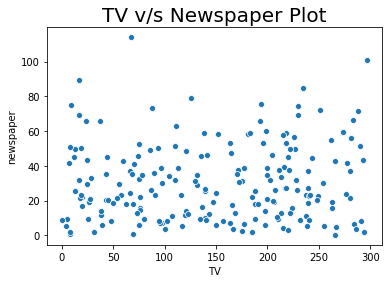

In [80]:
# scatter plot - 1 >>>

plt.title('TV v/s Newspaper Plot', fontsize = 20)
sns.scatterplot(ds['TV'], ds['newspaper'])

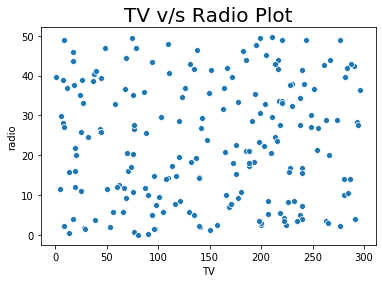

In [81]:
# scatter plot - 2 >>>

plt.title('TV v/s Radio Plot', fontsize = 20)
sns.scatterplot(ds['TV'], ds['radio'])

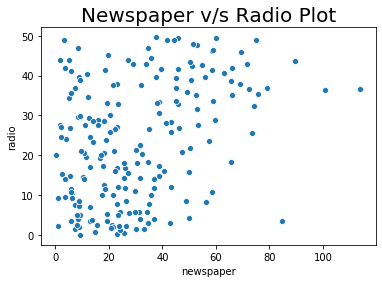

In [82]:
# scatter plot - 3 >>>

plt.title('Newspaper v/s Radio Plot', fontsize = 20)
sns.scatterplot(ds['newspaper'], ds['radio'])

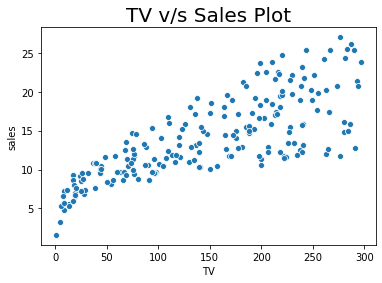

In [83]:
# scatter plot - 4 >>>

plt.title('TV v/s Sales Plot', fontsize = 20)
sns.scatterplot(ds['TV'], ds['sales'])

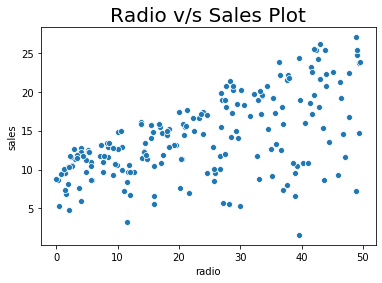

In [84]:
# scatter plot - 5 >>>

plt.title('Radio v/s Sales Plot', fontsize = 20)
sns.scatterplot(ds['radio'], ds['sales'])

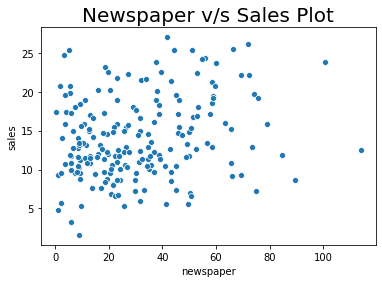

In [85]:
# scatter plot - 6 >>>

plt.title('Newspaper v/s Sales Plot', fontsize = 20)
sns.scatterplot(ds['newspaper'], ds['sales'])

OBSERVATIONS:

        1) In scatter plot 1, 2, 3, and 6 there are no proper pattern of data distribution seen.
        
        2) In scatter plot 4, 5, we can see linear pattern in data distribution.
        
        

In [19]:
ds_correlation = ds.corr()
ds_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


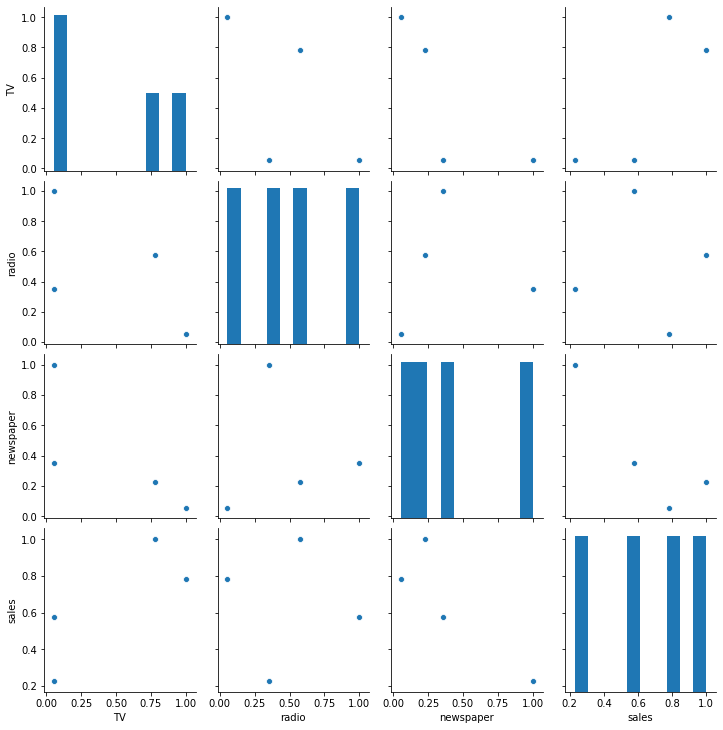

In [20]:
sns.pairplot(ds_correlation)

OBSERVATION:
    
    There are no proper pattern of data distribution seen in the correlation pair plot.

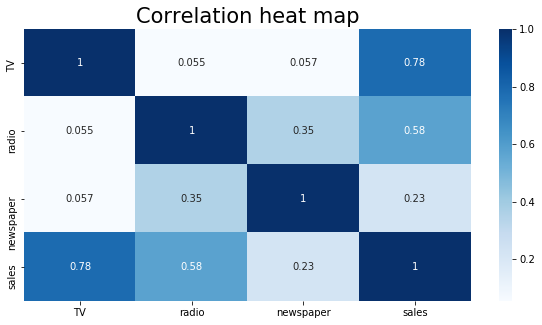

In [86]:
plt.figure(figsize=(10,5))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(ds_correlation,cmap='Blues', annot=True)

OBSERVATIONS:
    
    1) We can see the TV column is highly correlated with sales i.e. of 0.78 values.
    
    2) Newspaper column is least correlated with the sales i.e. of 0.23 values.

# REMOVING OUTLIERS AND SKEWNESS

In [21]:
# removing outliers:

z = np.abs(zscore(ds))

threshold = 3
print(np.where(z>threshold))

# creating new dataset without outliers and skewness

ds_new = ds[(z<3).all(axis=1)]


(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [22]:
ds_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [23]:
ds_new.shape

(198, 4)

In [24]:
ds.shape

(200, 4)

In [25]:
print(((ds.shape[0]-ds_new.shape[0])/ds.shape[0])*100)

1.0


OBSERVATION:

we can see that after removing outliers and skewness, there is 1% of dataloss.

In [26]:
ds_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [27]:
x = ds_new.iloc[:,0:3]
y = ds_new.iloc[:,-1]

print(x.shape)
print(y.shape)

(198, 3)
(198,)


# SCALING THE DATASET:

In [28]:
sc = StandardScaler()
X = sc.fit_transform(x)
columnlist = ['Tv', 'radio', 'newspaper']

X = pd.DataFrame(X, columns = columnlist)

In [29]:
#X

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(178, 3)
(178,)
(20, 3)
(20,)


# LINEAR MODEL METHOD:

In [31]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [32]:
print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

linearRegression Coeffient [3.83400385 2.79797198 0.01084367]
linearRegression Intercept 13.980749817401016
linearRegression score 0.8974288097887013


In [33]:
# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

array([ 9.06155215, 11.97493812, 23.1630651 ,  8.79995405, 10.51519161,
       22.16062162, 19.20598756, 11.38381823, 14.14776351, 17.79381827,
       14.19288267, 20.82154191,  8.65432829, 12.76001837,  6.59611375,
        8.92306349, 10.72009715, 12.49048186,  9.89163361, 11.63159253])

In [34]:
# calculating errors::


print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  1.517968525740724
MEAN SQUARED ERROR:  3.7137269763119805
ROOT MEAN SQUARED ERROR:  1.9271032604175575


In [35]:
print(cross_val_score(lm, X, y, cv=5).mean())

0.8853605756683912


# REGULARIZATION METHODS OF LASSO AND RIDGE:

In [36]:
from sklearn.linear_model import Lasso, Ridge

In [37]:
ls = Lasso(alpha = 0.01)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.8974201424646505

In [38]:
# try to minimize the coefficent variance

rd = Ridge(alpha= 0.01)

rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.897428807069336

# ELASTICNET METHOD:

In [39]:
# elasticNet is a combination of both lasso and ridge algorithms

from sklearn.linear_model import ElasticNet
enr= ElasticNet(alpha= 0.01)

enr.fit(x_train, y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train, y_train))
enr.coef_

0.8973950168163529


array([3.81064588, 2.77963117, 0.01360257])

In [56]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  1.519612581291489
MEAN SQUARED ERROR:  3.7390399190571157
ROOT MEAN SQUARED ERROR:  1.9336597216307516


In [55]:
print(cross_val_score(enr, X, y, cv=5).mean())

0.8855711962305615


# SUPPORT VECTOR REGRESSOR METHOD:

In [40]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.8852860221905604

kernel : poly
0.8433708154644682

kernel : rbf
0.9371110273847388


In [41]:
sv_rbf = SVR('rbf')
sv_rbf.fit(x_train, y_train)
print(sv_rbf.score(x_train, y_train))

0.9371110273847388


In [42]:
print(cross_val_score(sv_rbf, X, y, cv=5).mean())

0.9105355050541174


# DECISION TREE REGRESSOR METHOD::

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

1.0


In [44]:
y_pred = dtr.predict(x_test)
y_pred

array([ 8.8, 12.9, 25.5,  9.7,  5.3, 25.4, 19.6, 12.4, 15.5, 15.9, 12.9,
       25.4,  5.3, 13.2,  8.7, 10.6,  5.3, 11.4,  9.6, 11.8])

In [45]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.8450000000000003
MEAN SQUARED ERROR:  1.1845000000000003
ROOT MEAN SQUARED ERROR:  1.0883473710171767


In [46]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtr, X, y, cv=5).mean())

0.9516882658515868


# RANDOM FOREST REGRESSOR METHOD::

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [49]:
print(rf.score(x_train, y_train))

0.9969371532925126


In [50]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  0.5743000000000013
MEAN SQUARED ERROR:  0.5169283000000011
ROOT MEAN SQUARED ERROR:  0.7189772597238393


In [51]:
print(cross_val_score(rf, X, y, cv=5).mean())

0.9756064471705269


# ADA BOOST REGRESSOR METHOD:

In [52]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.9762919726491406


In [53]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.7924871826764922
MEAN SQUARED ERROR:  0.8960541534771715
ROOT MEAN SQUARED ERROR:  0.9466013698897607


In [54]:
print(cross_val_score(adr, X, y, cv=5).mean())

0.9592356405013632


In [57]:
adr.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': None}

# OBSERVATIONS:

After checking various regression model, we found out the ada boost regressor model has highest accuracy of 97.62 % with cross validation score of 0.95 which depicts less over fitting.
The mean absolute error, mean squared error, and root mean squared error of ada boost regressor is also less than other model's score.
so we can say that ada boost regressor is our best model.

# HYPER PARAMETER TUNING

In [67]:
# we can hyper tune our ada boost regressor to improve its accuracy:


from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [50, 100, 150],
              'learning_rate': [1, 2],
              'loss' : ['linear', 'square', 'exponential'],
              'random_state' : [40, 42, 0]             
             }

In [68]:
gs_adr = GridSearchCV(AdaBoostRegressor(), parameters, cv = 5)

In [69]:
gs_adr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1, 2],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [40, 42, 0]})

In [70]:
# searching best parameters:

gs_adr.best_params_

{'learning_rate': 2, 'loss': 'linear', 'n_estimators': 150, 'random_state': 42}

In [76]:
# Best parameters:
 
# learning_rate': 2, 'loss': 'linear', 'n_estimators': 150, 'random_state': 42 is our best parameters after hyper tuning.


# FINAL MODEL MAKING WITH BEST PARAMETERS:

In [72]:
adr_new = AdaBoostRegressor(learning_rate = 2, loss = 'linear', n_estimators = 150, random_state = 42)
adr_new.fit(x_train, y_train)
pred=adr_new.predict(x_test)
print(adr_new.score(x_train, y_train))

0.97648177508946


 score of ada boost regressor is : 97.64 %

In [73]:
print(cross_val_score(adr_new, X, y, cv=5).mean())

0.9598070264375197


cv score of ada boost regressor is 0.95

In [74]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.7428219794785137
MEAN SQUARED ERROR:  0.8040921057659652
ROOT MEAN SQUARED ERROR:  0.8967118298349617


# CONCLUSION:

After hyper tuning we can improve the accuracy of our model with point 0.02 % and reduce errors by 0.5 points approx.
so we can say that now our final model is the one having score of 97.64 %.

# SAVING THE MODEL:

In [77]:
import joblib
joblib.dump(adr_new, 'Vaibhav_advertising_sales_channels_project_Model.pkl')

['Vaibhav_advertising_sales_channels_project_Model.pkl']

# RELOADING MODEL

In [78]:
#Reloading the model and predicting the dataset.
adv_sales_prediction_adaboost_model = joblib.load('Vaibhav_advertising_sales_channels_project_Model.pkl')
adv_sales_prediction_adaboost_model.predict(x_train)

array([13.45333333, 18.1125    , 24.11315789,  7.47272727, 17.468     ,
       22.35      ,  7.95      , 12.58      ,  7.54444444, 12.63888889,
       19.246875  , 15.44583333, 10.24166667, 13.3       , 12.53333333,
       18.77763158, 16.365625  , 12.39714286, 19.246875  , 16.91333333,
       20.99736842,  7.1       , 13.1125    , 11.1625    ,  8.475     ,
        7.54583333, 17.64848485, 16.365625  ,  9.28333333, 24.79130435,
       18.72045455, 13.1125    , 19.33684211,  9.252     ,  8.68235294,
       12.53076923, 11.925     , 20.365     , 13.4673913 , 12.85227273,
       22.22222222,  9.82666667, 21.18648649, 11.1173913 , 24.83181818,
       12.53076923, 19.97349398,  8.39285714, 10.43913043, 15.56190476,
       19.5425    ,  8.77619048, 14.3       ,  8.72      , 22.44354839,
       20.05681818, 13.2       , 10.57142857, 13.88421053, 19.86666667,
       15.38333333, 15.45      , 10.39230769, 11.1       , 17.24857143,
       10.24878049, 12.53076923, 11.26451613, 19.21290323, 21.65

# THANK YOU

Name: Vaibhav Tayade
contact details: 8087970061
Email Id: vaibhav_t29@rediffmail.com